In [3]:
import pandas as pd 
import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

import datetime 

from mpl_finance import candlestick_ohlc

In [4]:
file_path = ('data/TM.csv')
tm_df = pd.read_csv(file_path)

tm_df = tm_df.set_index('Date')

tm_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-26,114.930000,115.699997,114.750000,115.500000,115.500000,211200
2016-10-27,115.389999,115.500000,114.809998,114.849998,114.849998,216100
2016-10-28,114.839996,115.139999,114.410004,114.809998,114.809998,140500
2016-10-31,115.510002,115.790001,115.400002,115.660004,115.660004,135000
2016-11-01,115.760002,115.760002,114.180000,114.730003,114.730003,307300
...,...,...,...,...,...,...
2021-10-19,178.809998,178.850006,178.089996,178.669998,178.669998,197800
2021-10-20,178.669998,178.669998,177.020004,177.750000,177.750000,161000
2021-10-21,174.000000,175.199997,173.800003,174.020004,174.020004,218700


In [5]:
tm_df.index = pd.to_datetime(tm_df.index)
tm_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-26,114.930000,115.699997,114.750000,115.500000,115.500000,211200
2016-10-27,115.389999,115.500000,114.809998,114.849998,114.849998,216100
2016-10-28,114.839996,115.139999,114.410004,114.809998,114.809998,140500
2016-10-31,115.510002,115.790001,115.400002,115.660004,115.660004,135000
2016-11-01,115.760002,115.760002,114.180000,114.730003,114.730003,307300
...,...,...,...,...,...,...
2021-10-19,178.809998,178.850006,178.089996,178.669998,178.669998,197800
2021-10-20,178.669998,178.669998,177.020004,177.750000,177.750000,161000
2021-10-21,174.000000,175.199997,173.800003,174.020004,174.020004,218700


In [6]:
tm_df.dtypes


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

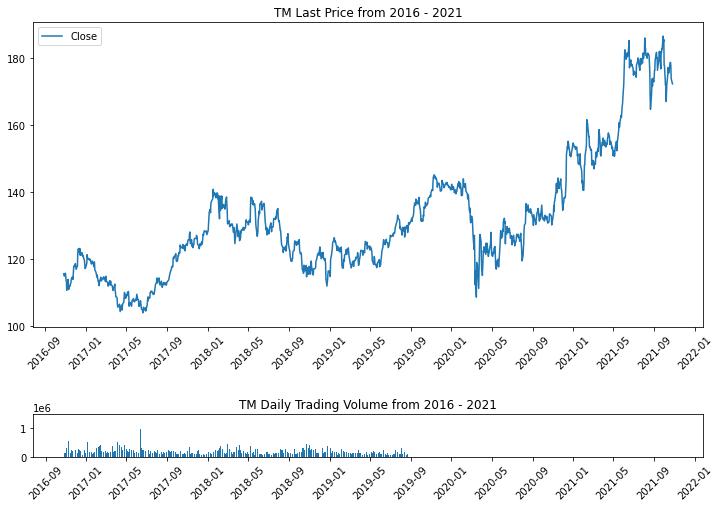

In [8]:
# Top plot consisting of daily closing prices 

top = plt.subplot2grid((4,4), (0,0), rowspan = 3, colspan = 4)
top.plot(tm_df.index, tm_df["Close"], label = "Close")

plt.title("TM Last Price from 2016 - 2021")
plt.legend(loc = 2)
plt.xticks(rotation = 45)

top.xaxis.set_major_locator(mdates.MonthLocator(interval = 4))

formatter = mdates.DateFormatter("%Y-%m")
top.xaxis.set_major_formatter(formatter)



#Bottom plot consisting of daily trading volume 
bottom = plt.subplot2grid((4,4), (3,0), rowspan = 1, colspan = 4)
bottom.bar(tm_df.index, tm_df["Volume"])

plt.title("TM Daily Trading Volume from 2016 - 2021")
plt.xticks(rotation = 45)


bottom.xaxis.set_major_locator(mdates.MonthLocator(interval = 4))

bottom.xaxis.set_major_formatter(formatter)


plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace = 2.0)

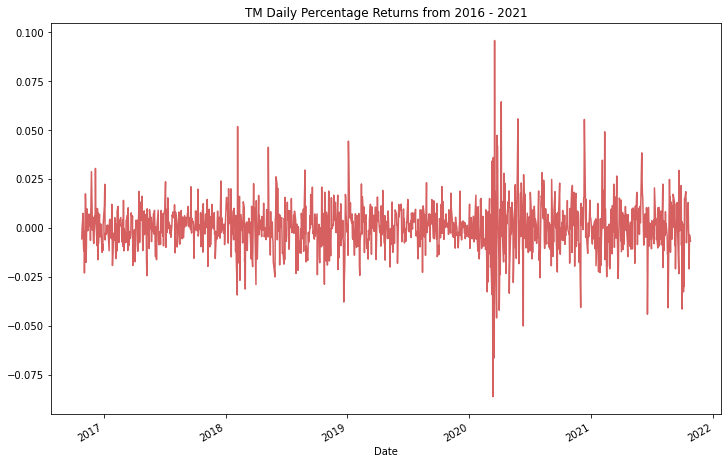

In [9]:
daily_changes = tm_df["Close"].pct_change(periods = 1)
daily_changes.plot(figsize = (12, 8), color = '#d65f5f', label = "Close")

plt.title("TM Daily Percentage Returns from 2016 - 2021");

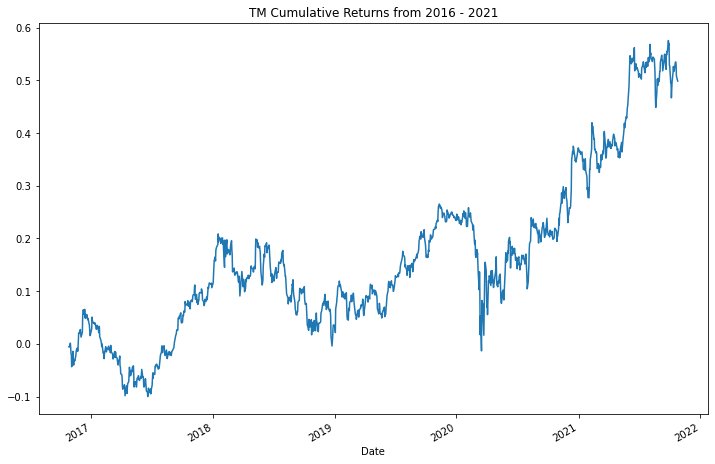

In [10]:
df_cumsum = daily_changes.cumsum()

df_cumsum.plot(figsize = (12, 8))

plt.title("TM Cumulative Returns from 2016 - 2021");

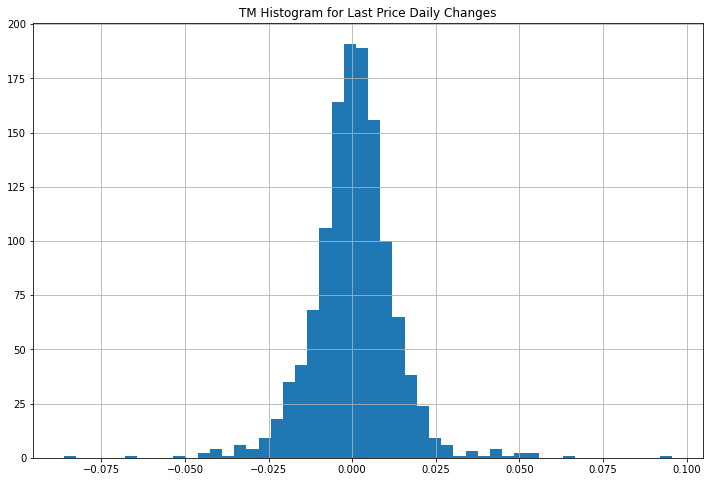

In [11]:
daily_changes.hist(bins = 50, figsize = (12, 8))

plt.title("TM Histogram for Last Price Daily Changes");

In [12]:
daily_changes.describe()

count    1257.000000
mean        0.000397
std         0.012562
min        -0.086245
25%        -0.005783
50%         0.000443
75%         0.006968
max         0.095760
Name: Close, dtype: float64

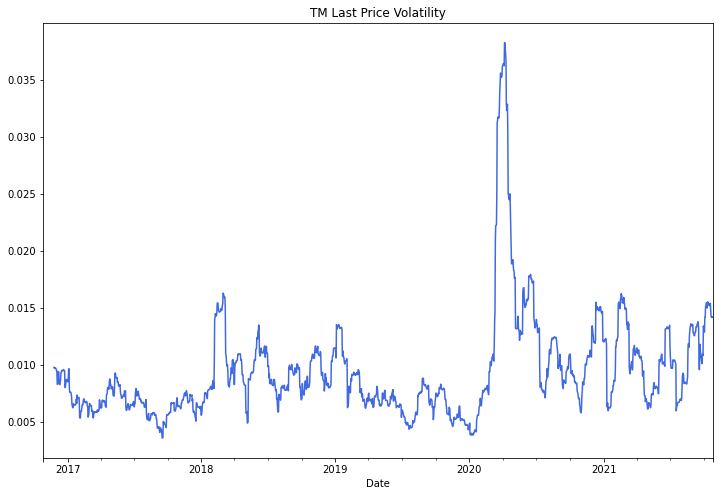

In [13]:
df_filled = tm_df["Close"].asfreq("D", method = "ffill")
df_returns = df_filled.pct_change()
df_stf = df_returns.rolling(window = 30).std()

df_stf.plot(figsize = (12, 8), color = "royalblue")

plt.title('TM Last Price Volatility');

In [14]:
df_subset = tm_df[tm_df.index > '2021-01-01']
df_subset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,155.809998,155.809998,152.020004,153.289993,153.289993,315600
2021-01-05,151.910004,153.399994,151.750000,153.399994,153.399994,231800
2021-01-06,152.710007,154.169998,152.479996,153.529999,153.529999,296100
2021-01-07,151.660004,152.699997,151.509995,152.669998,152.669998,345000
2021-01-08,153.600006,154.059998,152.110001,152.850006,152.850006,418100
...,...,...,...,...,...,...
2021-10-19,178.809998,178.850006,178.089996,178.669998,178.669998,197800
2021-10-20,178.669998,178.669998,177.020004,177.750000,177.750000,161000
2021-10-21,174.000000,175.199997,173.800003,174.020004,174.020004,218700


/Users/abdullahberakucuk/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


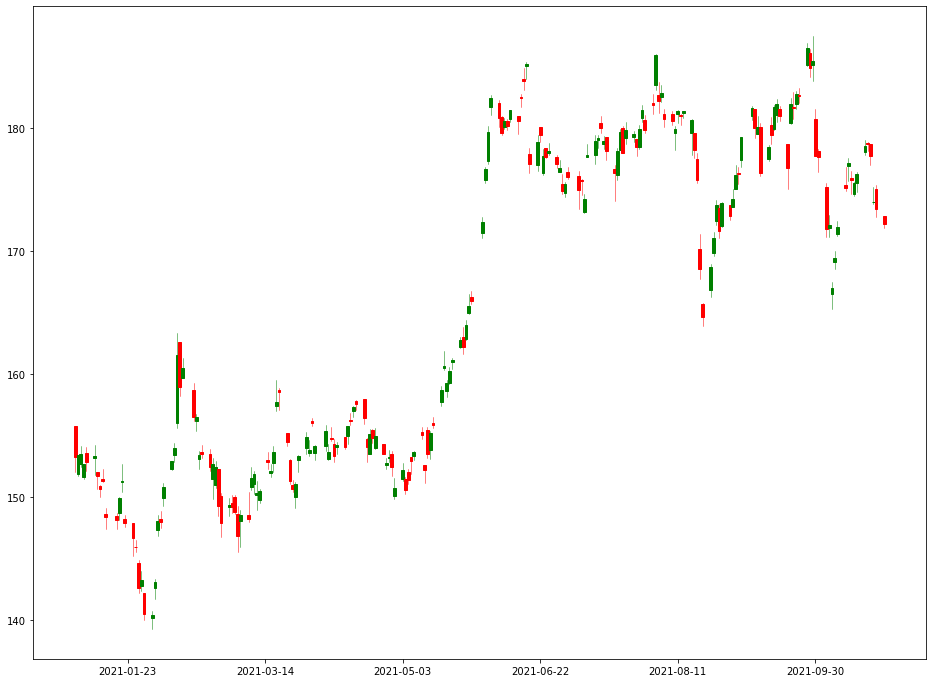

In [15]:
# OHLC - Open/ High/ Low/ Close
df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date','Open', 'High', 'Low', 'Close']]

figure, ax = plt.subplots(figsize = (16, 12))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax, 
                df_ohlc.values, 
                width = 1,
                colorup = 'green',
                colordown = 'red')

plt.show()